# PIPELINE STRUCTURE 
importing Libraries
loading dataset
data preprocessing
eploratory data Analysis
feature Engineering
feature selection
model data preparation
model building
model Evaluation
Hyperparameter Tuning / future enchasing and evaluating model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace('*',"")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df.dropna(how = 'all',subset = ['END_DATE','CATEGORY','START','STOP','PURPOSE'],inplace = True)

In [9]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [10]:
(df['PURPOSE'].isnull().sum()/df.shape[0])*100

np.float64(43.46320346320346)

In [11]:
df.shape[1]

7

In [12]:
df.CATEGORY.value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

In [13]:
df.PURPOSE.fillna(method = 'ffill', inplace = True)

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [16]:
## datetime
df.START_DATE = pd.to_datetime(df['START_DATE'],errors= 'coerce')
df.END_DATE = pd.to_datetime(df['END_DATE'],errors= 'coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [18]:
## which are top 10 starting point of the trip
start_point = df.START.value_counts()
start_point.head(10)

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: ylabel='count'>

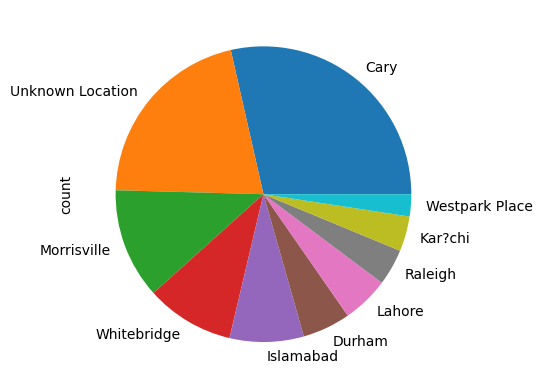

In [19]:
start_point.head(10).plot(kind = 'pie')

<Axes: ylabel='count'>

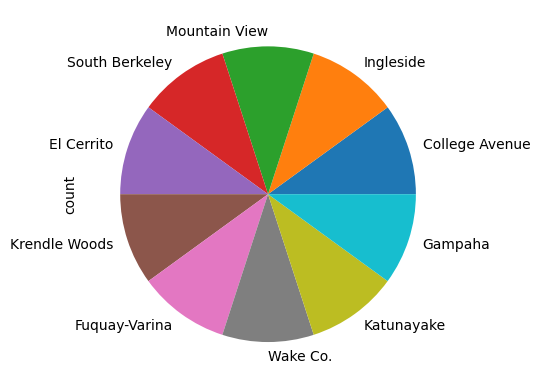

In [20]:
### least booked start points
start_point.tail(10).plot(kind = 'pie')

In [21]:
## locations are topmost stop points
stop_points = df.STOP.value_counts()
stop_points 

STOP
Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
El Cerrito            1
Fuquay-Varina         1
Wake Co.              1
Gampaha               1
Ilukwatta             1
Name: count, Length: 188, dtype: int64

<Axes: ylabel='count'>

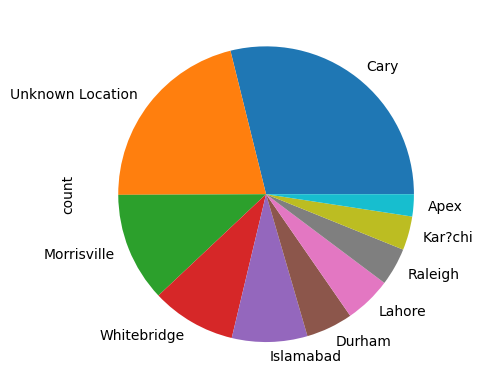

In [22]:
## locations are least preffered stop points
stop_points.head(10).plot(kind='pie')

<Axes: ylabel='count'>

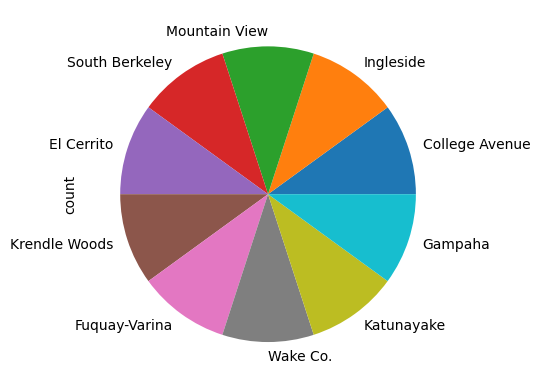

In [23]:
start_point.tail(10).plot(kind = 'pie')

<Axes: xlabel='MILES'>

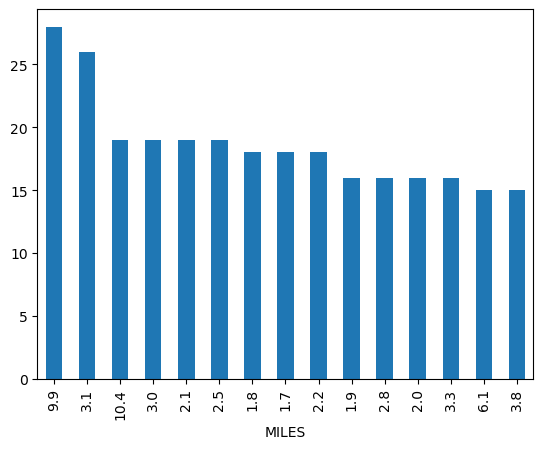

In [24]:
## pattern in miles travelled ## conclusion on purpose of rides ## Round trips ## duration
df.MILES.value_counts().head(15).plot(kind='bar')

<Axes: xlabel='MILES', ylabel='Density'>

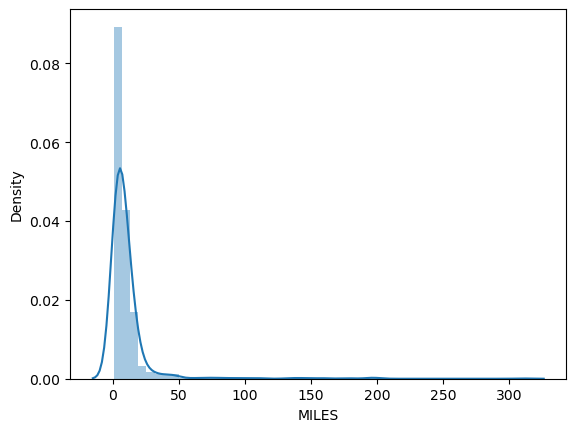

In [25]:
sns.distplot(df.MILES)

In [26]:
df.MILES.value_counts().tail(15)

MILES
195.9    1
45.9     1
13.1     1
36.6     1
43.6     1
39.2     1
43.9     1
18.5     1
11.1     1
18.9     1
103.0    1
32.3     1
23.2     1
10.7     1
48.2     1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='PURPOSE'>

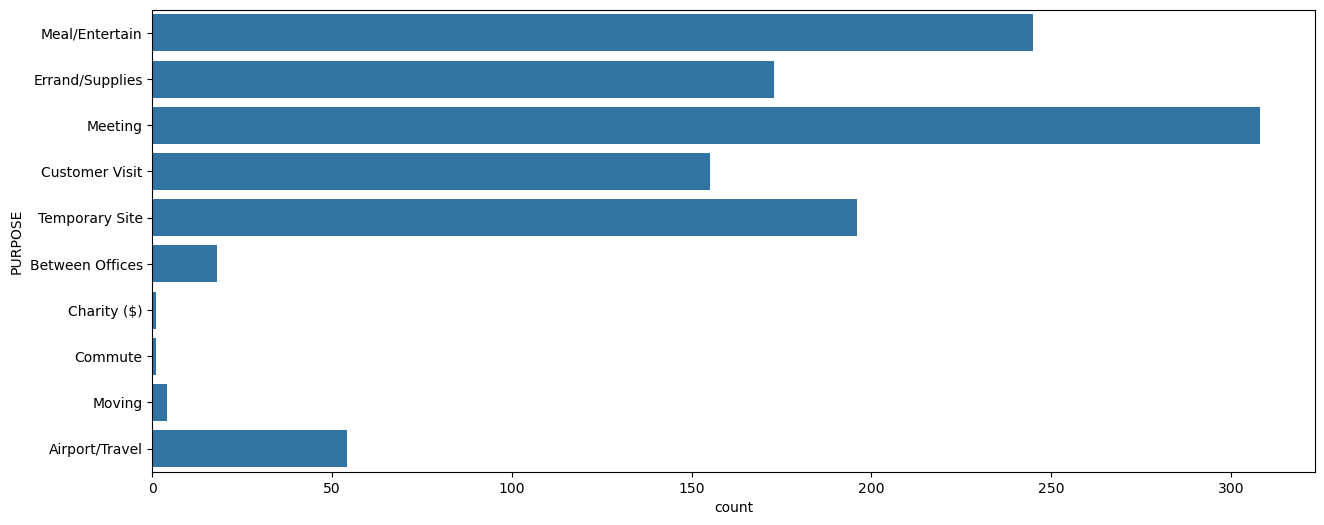

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df.PURPOSE)

In [28]:
df.describe()

,START_DATE,END_DATE,MILES
count,421,420,1155.000000
mean,2016-07-01 12:31:09.976247040,2016-07-01 12:11:10.142857216,10.566840
min,2016-01-01 21:11:00,2016-01-01 21:17:00,0.500000
25%,2016-04-01 13:43:00,2016-03-27 15:10:00,2.900000
50%,2016-07-04 18:23:00,2016-07-04 18:19:00,6.000000
75%,2016-10-10 17:22:00,2016-10-10 17:39:15,10.400000
max,2016-12-12 20:48:00,2016-12-12 20:57:00,310.300000
std,NaN,NaN,21.579106


In [29]:
df.groupby(['START','STOP'])['MILES'].mean().reset_index().sort_values('MILES',ascending=False)

,START,STOP,MILES
173,Latta,Jacksonville,310.3
143,Jacksonville,Kissimmee,201.0
11,Asheville,Mebane,195.9
204,Morrisville,Banner Elk,195.3
27,Boone,Cary,180.2
...,...,...,...
184,Medical Centre,Tudor City,0.7
297,Sunnyside,Ingleside,0.7
56,Central,West Berkeley,0.6
155,Katunayaka,Katunayaka,0.5


In [30]:
def rounds(x):
    if x['START'] == x['STOP']:
        return 'Yes'
    else:
        return 'No'
df['ROUND_TRIP'] = df.apply(rounds, axis=1)

In [31]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Yes
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,Yes
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Yes
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Yes
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,No
...,...,...,...,...,...,...,...,...
1150,NaT,NaT,Business,Kar?chi,Kar?chi,0.7,Meeting,Yes
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,No
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,Yes
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,No


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

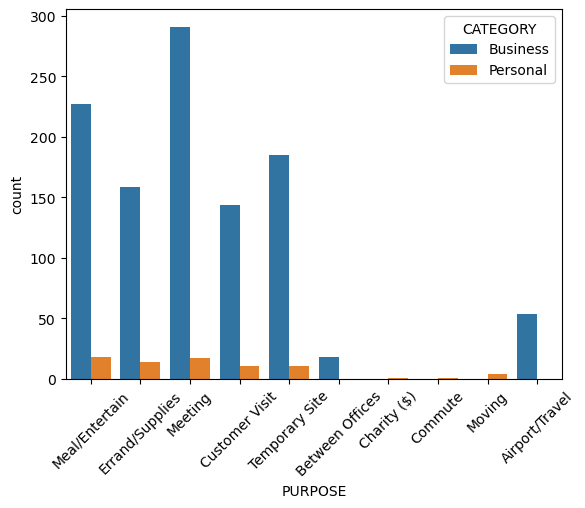

In [37]:
sns.countplot(data=df,x = 'PURPOSE',hue='CATEGORY')
plt.xticks(rotation = 45)

In [ ]:
### FInal Conclusions
## In Decemner higher number of rides were taken
## Most of the rides were taken for 'Business' purpose
## Most of the rides were taken from 'San Francisco' to 'San Francisco International Airport'
## Round trips were also taken